In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

sys.path.append('../src')
from simulation.user_sessions import user_weekly_session_dist, user_weekly_sessions, simulate_users

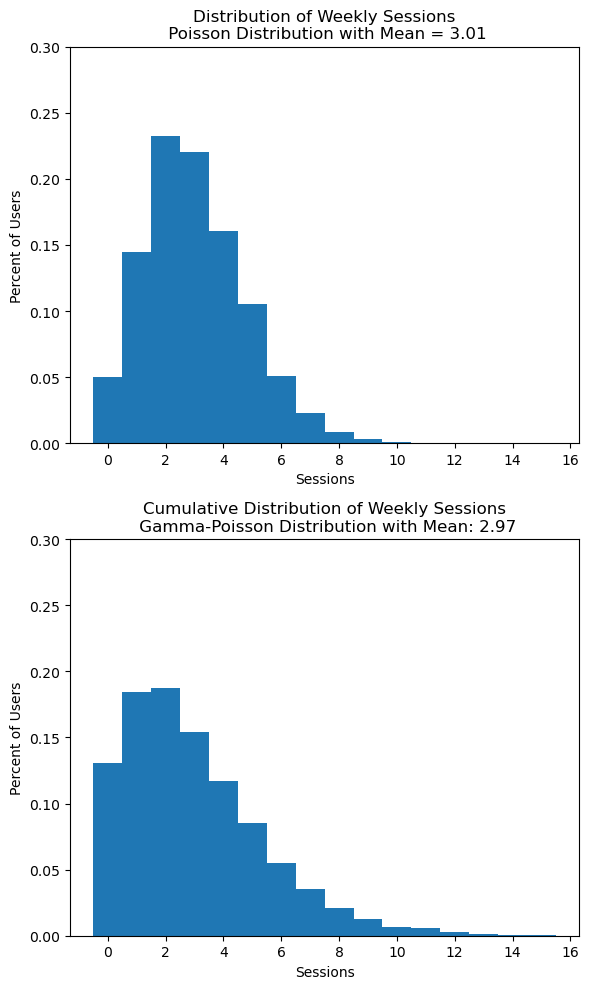

In [3]:
poisson_weekly_user_sessions = []
gamma_poisson_weekly_user_sessions = []

for _ in range(10000):
    lam = user_weekly_session_dist()
    poisson_sessions_capped = min(user_weekly_sessions(3), 15)
    poisson_weekly_user_sessions.append(poisson_sessions_capped)
    lam_sessions_capped = min(user_weekly_sessions(lam), 15)
    gamma_poisson_weekly_user_sessions.append(lam_sessions_capped)

poisson_mean = np.mean(poisson_weekly_user_sessions) 
gamma_poisson_mean = np.mean(gamma_poisson_weekly_user_sessions)

fig, axs = plt.subplots(2, 1, figsize=(6,10))

axs[0].hist(poisson_weekly_user_sessions, 
            bins=range(0, 17), 
            align='left', 
            density=True
)
axs[0].set_xlabel('Sessions')
axs[0].set_ylabel('Percent of Users')
axs[0].set_title('Distribution of Weekly Sessions\n Poisson Distribution with Mean = {:.2f}'.format(poisson_mean))
axs[0].set_ylim(0, 0.3)

axs[1].hist(gamma_poisson_weekly_user_sessions, 
            bins=range(0, 17), 
            align='left', 
            density=True
)
axs[1].set_xlabel('Sessions')
axs[1].set_ylabel('Percent of Users')
axs[1].set_title('Cumulative Distribution of Weekly Sessions\n Gamma-Poisson Distribution with Mean: {:.2f}'.format(gamma_poisson_mean))
axs[1].set_ylim(0, 0.3)

plt.tight_layout()
plt.show()

Both distributions produce a sample mean around 3. Using the gamma distribution  at $\alpha = 3$ and $\theta = 1$ to determine the poisson parameter creates a longer tail at a given mean than using poisson alone at $\lambda = 3$. I think the former better models the wider range of activity between different users, such as the existence of power users.

In [4]:
pre_c_users, post_c_users, pre_t_users, post_t_users = simulate_users(10000,4)

c_users = np.concatenate([pre_c_users, post_c_users], axis=1)
t_users = np.concatenate([pre_t_users, post_t_users], axis=1)

print('Mean User Sessions per Period (No Effect)')
print('Control:', np.mean(c_users))
print('Treatment:', np.mean(t_users))

pre_c_users, post_c_users, pre_t_users, post_t_users = simulate_users(10000,4,exp_effect=.5)

c_users = np.concatenate([pre_c_users, post_c_users], axis=1)
t_users = np.concatenate([pre_t_users, post_t_users], axis=1)

print(c_users)
print(t_users)

print('Mean User Sessions per Period (+50% Effect)')
print('Control:', np.mean(c_users))
print('Treatment:', np.mean(t_users))

Mean User Sessions per Period (No Effect)
Control: 2.986675
Treatment: 3.0279
[[ 2  0  1 ...  0  1  4]
 [ 2  4  0 ...  1  3  3]
 [ 3  1  1 ...  1  1  3]
 ...
 [ 1  1  3 ...  1  0  3]
 [ 1  1  1 ...  0  0  2]
 [12  6  5 ...  5  8  7]]
[[ 5  2  2 ...  2  2  5]
 [ 6 11  5 ...  6  3  6]
 [12  1  4 ... 19 22 14]
 ...
 [ 4  1  3 ...  2  3  2]
 [ 3  2  3 ...  5  1  2]
 [ 1  1  2 ...  0  3  5]]
Mean User Sessions per Period (+50% Effect)
Control: 2.96995
Treatment: 3.72005


Added simple random walk to model within user variation. Each time period applies a percent change on the poisson lambda equal to a sample from a normal distribution at $\sigma = .1$. Min global change is set at -66% and max global at +100%.